In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


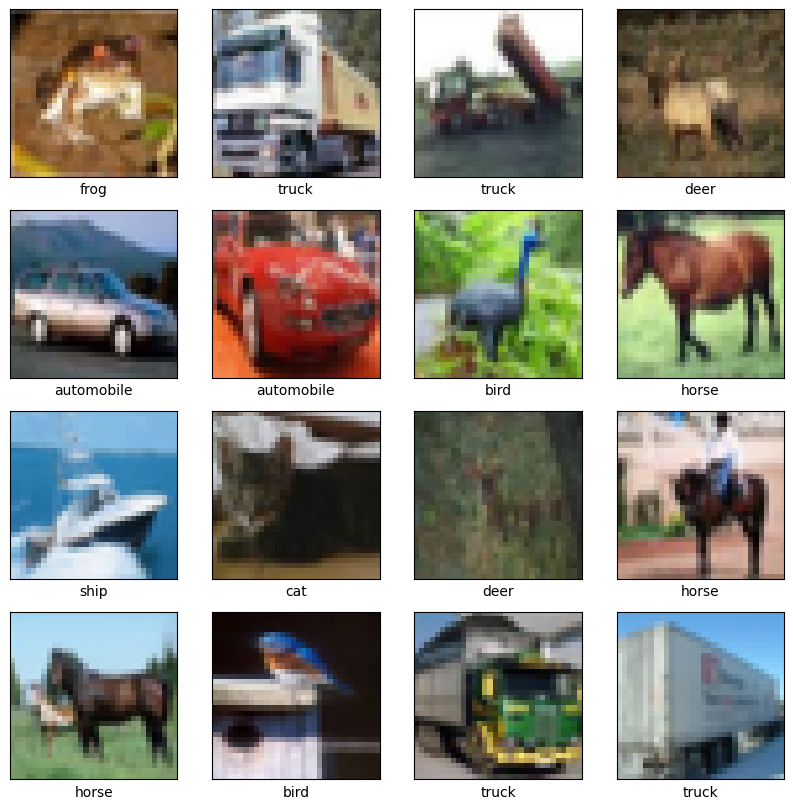

In [ ]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,149,002 (4.38 MB)

 Trainable params: 1,149,002 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=768, epochs=30, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/30
26/66 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.1738 - loss: 2.1973

KeyboardInterrupt: 

In [ ]:
import numpy as np
def predict(model, data):
    probs = model.predict(data)
    label = np.argmax(probs, axis=1)
    return [class_names[_] for _ in label]


__let's test the model on some the test samples__

In [ ]:
sample = np.random.permutation(len(X_test))[:16]
inputs = X_test[sample]
true_labels = y_test[sample]
labels = predict(model, inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


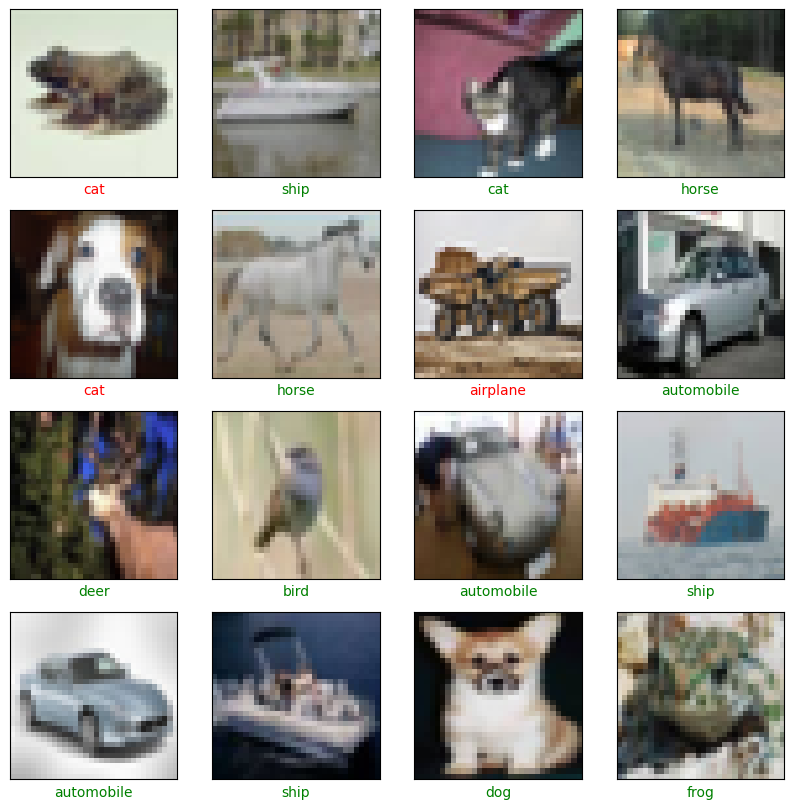

Accuracy: 81 %


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
t_correct = 0
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(inputs[i], cmap=plt.cm.binary)
    correctness = class_names[true_labels[i][0]] == labels[i]
    if correctness: t_correct += 1
    color = "green" if correctness else "red"
    name = f"{labels[i]}"
    plt.xlabel(name, color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()
print("Accuracy:", int(100*t_correct/16), '%')